# tutorial
http://www.statsmodels.org/stable/vector_ar.html

In [1]:
 # some example data
import numpy as np

import pandas

import statsmodels.api as sm

from statsmodels.tsa.api import VAR, DynamicVAR

mdata = sm.datasets.macrodata.load_pandas().data

 # prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str

quarterly = dates_from_str(quarterly)

mdata = mdata[['realgdp','realcons','realinv']]

mdata.index = pandas.DatetimeIndex(quarterly)

data = np.log(mdata).diff().dropna()

 # make a VAR model
model = VAR(data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [6]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Nov, 2018
Time:                     15:16:38
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

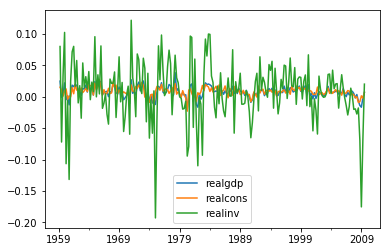

In [8]:
data.plot()

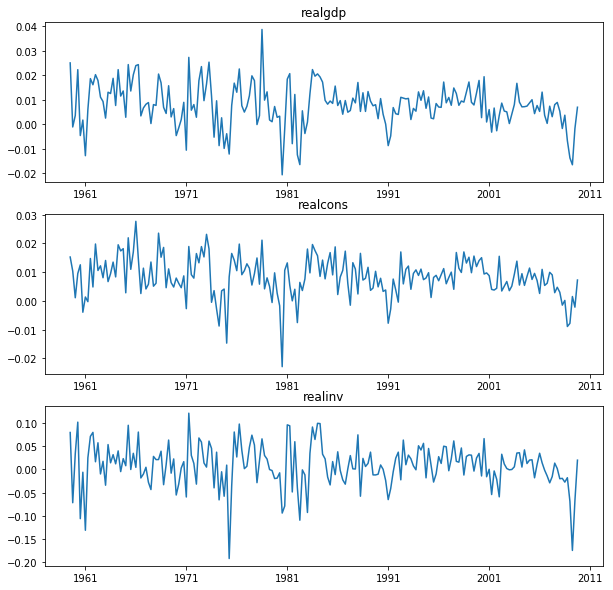

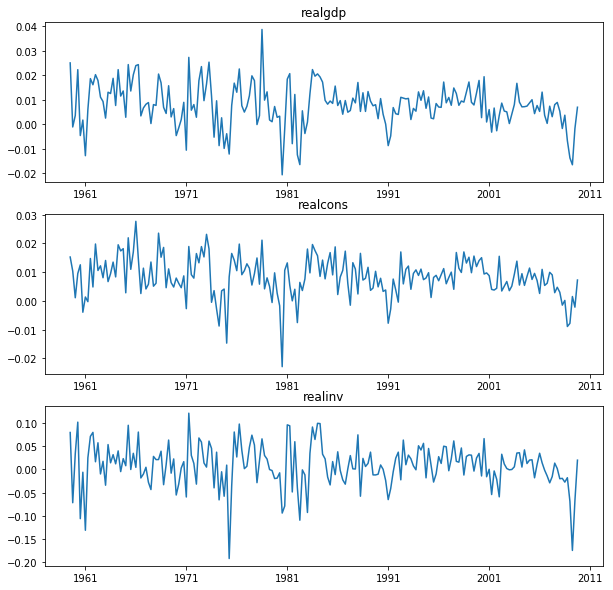

In [9]:
results.plot()

In [10]:
model.select_order(15)

In [11]:
results = model.fit(maxlags=15, ic='aic')

In [13]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Nov, 2018
Time:                     15:19:20
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4257
Nobs:                     199.000    HQIC:                  -27.7212
Log likelihood:           1961.15    FPE:                7.47593e-13
AIC:                     -27.9222    Det(Omega_mle):     6.45336e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001281         0.001295            0.989           0.322
L1.realgdp         -0.286148         0.171582           -1.668           0.095
L1.realcons         0.673869         0.132245            5.096    

In [14]:
lag_order = results.k_ar


3

In [16]:
results.forecast(data.values[-lag_order:], 10)

array([[ 0.00616044,  0.00500006,  0.00916198],
       [ 0.00427559,  0.00344836, -0.00238478],
       [ 0.00416634,  0.0070728 , -0.01193629],
       [ 0.00557873,  0.00642784,  0.00147152],
       [ 0.00626431,  0.00666715,  0.00379567],
       [ 0.00651738,  0.00764936,  0.00198474],
       [ 0.00690284,  0.00760909,  0.00548495],
       [ 0.00714517,  0.00775843,  0.00620737],
       [ 0.007258  ,  0.0079993 ,  0.00602391],
       [ 0.00738975,  0.00804623,  0.00690895]])

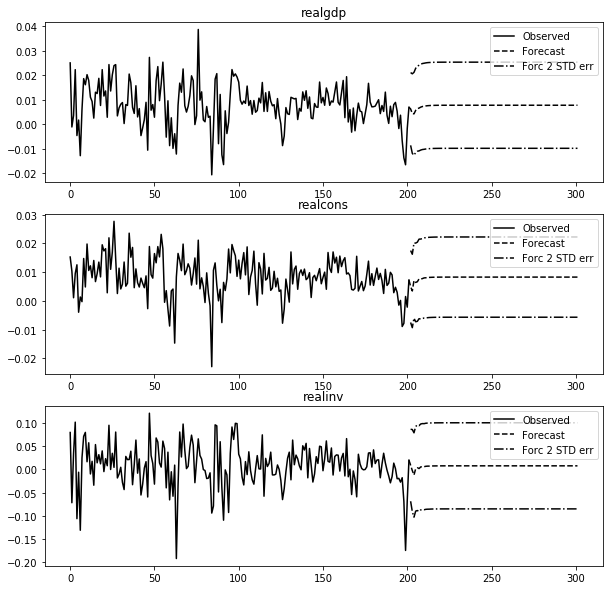

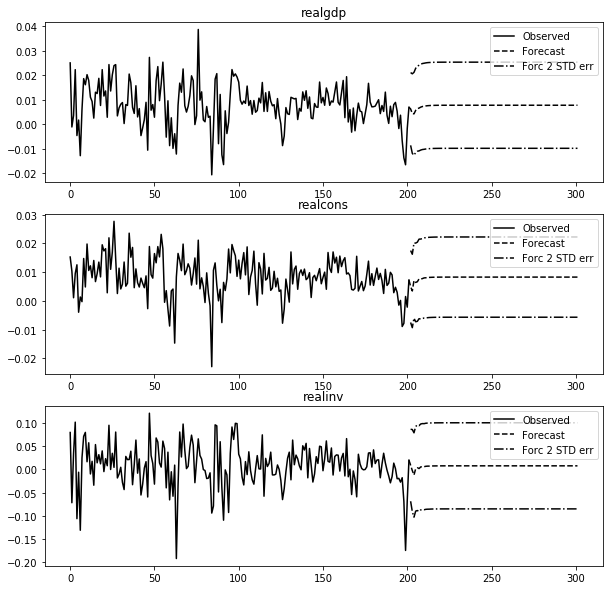

In [18]:
results.plot_forecast(100)

# やってみる

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

import plotly
plotly.offline.init_notebook_mode(connected=False)

In [48]:
data = pd.read_csv("../data/trackA11000w2.csv")
data["date"] = pd.date_range(start='2017-4-1', end="2018-3-31", freq="D")
data.set_index('date', inplace=True)
print(data.shape)
data.head()

(365, 5)


10998  10999  11000  11001  11002
date                                         
2017-04-01  -1.33  -1.43  -1.05  -0.31   0.50
2017-04-02  -1.27  -1.48  -1.20  -0.52   0.31
2017-04-03  -1.28  -1.44  -1.12  -0.42   0.39
2017-04-04  -1.07  -1.51  -1.49  -0.95  -0.10
2017-04-05  -1.00  -1.40  -1.50  -1.16  -0.45

In [49]:
data = data.diff().dropna()

In [50]:
data_plot = []

for key,column in data.iteritems():
    plot = plotly.graph_objs.Scatter(y=column, x=data.index, name=key)
    data_plot.append(plot)

In [51]:
layout = plotly.graph_objs.Layout(
    title="高低左",
    xaxis={"title":"date"},
)

In [52]:
fig = plotly.graph_objs.Figure(data=data_plot, layout=layout)
plotly.offline.iplot(fig)

In [55]:
model = VAR(data)
results = model.fit(maxlags=15, ic='aic')
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Nov, 2018
Time:                     20:44:51
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -18.7595
Nobs:                     274.000    HQIC:                  -19.5884
Log likelihood:           920.795    FPE:                1.78725e-09
AIC:                     -20.1441    Det(Omega_mle):     1.23546e-09
--------------------------------------------------------------------
Results for equation 10998
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.010349         0.048476           -0.213           0.831
L1.10998        -0.489386         2.031119           -0.241           0.810
L1.10999        -2.633450         5.852409           -0.450           0.653
L1.1

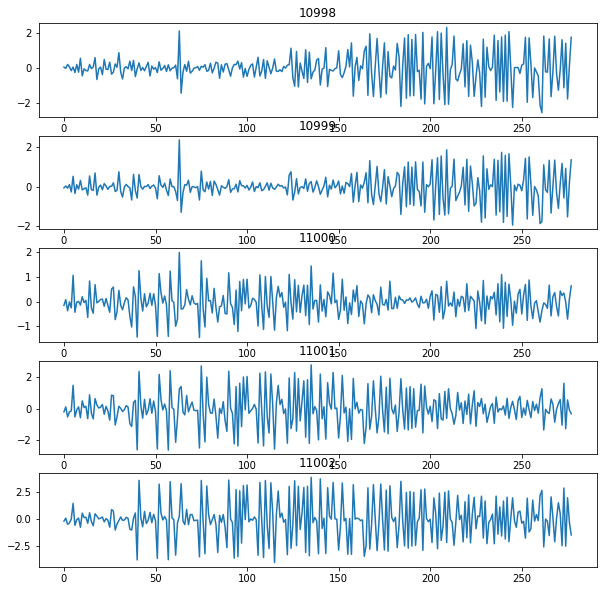

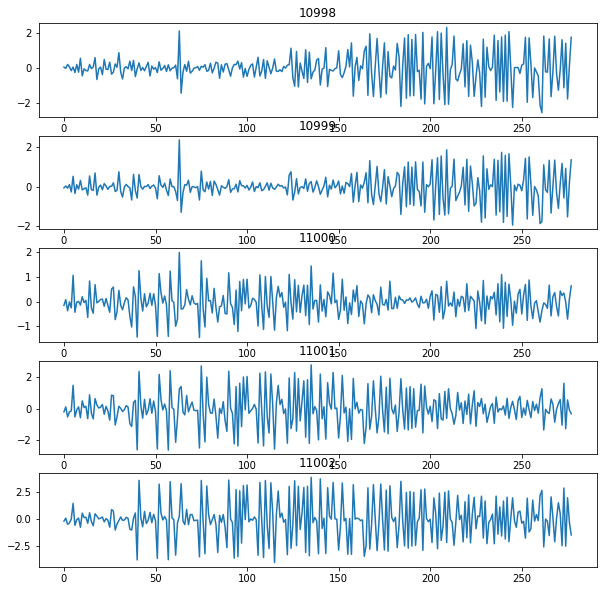

In [56]:
results.plot()

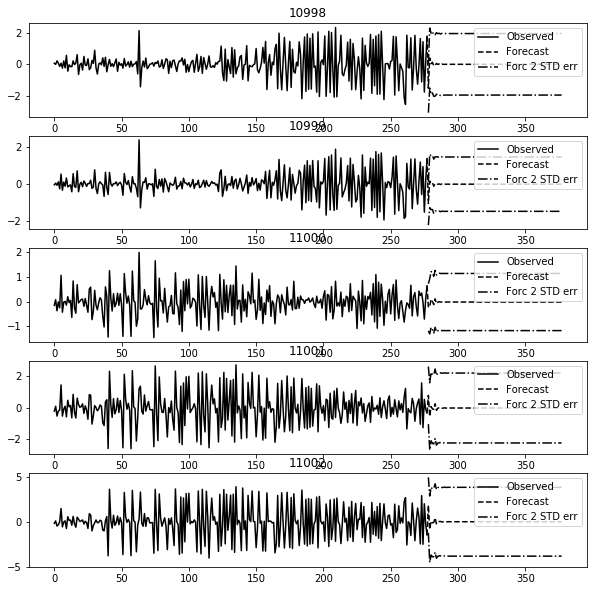

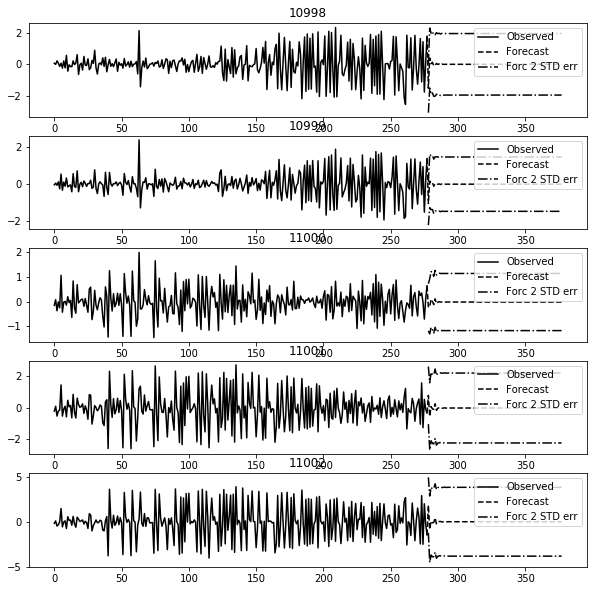

In [57]:
results.plot_forecast(100)

# trackA全地点に対して

In [23]:
import pandas as pd

In [24]:
fname = "../data/trackA/track_A.csv"
chunksize = pd.read_csv("../data/trackA/track_A.csv")["キロ程"].nunique()

def preprocess(x):
  y = x.pivot(index="date",columns='キロ程', values='高低左')
  return y

reader = pd.read_csv(fname, chunksize=chunksize)
kilo = pd.concat((preprocess(r) for r in reader), ignore_index=True)
kilo.index = pd.date_range(start="2017-4-1", end="2018-3-31")

In [25]:
window = 100
kilo = kilo.loc[:,10000:10000+window]
#とりあえず線形補間
kilo =  kilo.interpolate(method='index')
kilo =  kilo.interpolate(method='index',axis=1)
#端のnanをうめる
kilo = kilo.fillna(kilo.mean())
kilo.head()

キロ程         10000  10001  10002  10003  10004  10005  10006  10007  10008  \
2017-04-01  -1.16  -1.17  -1.09  -0.64  0.470  2.100  3.610  4.050  2.710   
2017-04-02  -0.81  -0.83  -0.71  -0.15  1.010  2.590  3.930  4.160  2.700   
2017-04-03  -0.99  -0.91  -0.67  -0.02  1.220  2.860  4.270  4.550  3.130   
2017-04-04  -0.98  -0.81  -0.50   0.18  1.385  2.945  4.265  4.495  3.085   
2017-04-05  -0.97  -0.71  -0.33   0.38  1.550  3.030  4.260  4.440  3.040   

キロ程         10009  ...    10091  10092  10093  10094  10095  10096  10097  \
2017-04-01 -0.290  ...     0.36   0.19   0.34   0.60   0.72   0.53   0.08   
2017-04-02 -0.300  ...     0.41   0.19   0.26   0.46   0.55   0.38  -0.04   
2017-04-03  0.110  ...     0.30   0.09   0.20   0.48   0.65   0.54   0.17   
2017-04-04  0.125  ...     0.21   0.03   0.21   0.55   0.79   0.71   0.30   
2017-04-05  0.140  ...     0.25   0.09   0.28   0.63   0.86   0.76   0.33   

キロ程         10098  10099  10100  
2017-04-01  -0.39  -0.60  -0.43  
2017-04-02  -0.51  -0.75  -0.61  
2017-04-03  -0.26  -0.47  -0.33  
2017-04-04  -0.22  -0.55  -0.51  
2017-04-05  -0.20  -0.55  -0.51  

[5 rows x 101 columns]

In [26]:
#差分とる
kilo = kilo.diff().dropna()

In [28]:
model = VAR(kilo)
results = model.fit(maxlags=15, ic='aic')
results.summary()

LinAlgError: 45-th leading minor of the array is not positive definite

# statespaceの方をつかってみる

In [29]:
import numpy as np

import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

In [30]:
dta = sm.datasets.webuse('lutkepohl2', 'https://www.stata-press.com/data/r12/')

dta.index = dta.qtr

endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]

In [31]:
endog

dln_inv   dln_inc  dln_consump
qtr                                        
1960-04-01 -0.005571  0.030570     0.014355
1960-07-01  0.032970  0.042111     0.030411
1960-10-01  0.037139  0.016360     0.031749
1961-01-01  0.094363  0.031939     0.024257
1961-04-01 -0.043591  0.021381    -0.002181
1961-07-01  0.024451  0.001921     0.044831
1961-10-01  0.033257  0.035819     0.016563
1962-01-01  0.076442  0.014706     0.020326
1962-04-01 -0.008696  0.018084     0.025821
1962-07-01  0.021599  0.028270     0.011696
1962-10-01  0.012739  0.015558     0.017292
1963-01-01 -0.140184  0.013629     0.007590
1963-04-01  0.193585  0.013446     0.016870
1963-07-01  0.035367  0.018197     0.014760
1963-10-01  0.015326  0.027488     0.016349
1964-01-01  0.003795  0.023642     0.033661
1964-04-01  0.058840  0.016989     0.000000
1964-07-01  0.007118  0.010663     0.020690
1964-10-01  0.034847  0.050232     0.026938
1965-01-01 -0.020762  0.021384     0.024611
1965-04-01  0.054435  0.034653     0.035036
1965-07-01  0.006601  0.022897     0.021672
1965-10-01  0.009820  0.015852     0.022711
1966-01-01  0.032054  0.003924     0.016333
1966-04-01 -0.009509  0.016829     0.010256
1966-07-01 -0.025808  0.036551     0.015908
1966-10-01 -0.006557 -0.028878    -0.012997
1967-01-01 -0.040274  0.011400     0.022990
1967-04-01 -0.059983  0.006278    -0.007128
1967-07-01 -0.007299  0.000000     0.014205
...              ...       ...          ...
1971-07-01 -0.004040  0.027628     0.020519
1971-10-01  0.008064  0.036486     0.028600
1972-01-01  0.054701  0.026710     0.034184
1972-04-01 -0.013397  0.018434     0.000908
1972-07-01 -0.005797  0.024061     0.038278
1972-10-01  0.028656  0.028563     0.024160
1973-01-01  0.076124  0.022136     0.036002
1973-04-01 -0.039151  0.014025     0.010634
1973-07-01 -0.023876  0.017944     0.010522
1973-10-01 -0.011215  0.020982     0.019929
1974-01-01  0.047716  0.015288     0.021859
1974-04-01 -0.062867  0.026686     0.016846
1974-07-01  0.001906  0.035335     0.028445
1974-10-01 -0.011494  0.017819     0.011739
1975-01-01  0.013397  0.028813     0.022359
1975-04-01 -0.030890  0.040017     0.035042
1975-07-01  0.017493 -0.001707     0.022473
1975-10-01  0.035954  0.013575     0.020660
1976-01-01  0.020240  0.015055     0.021534
1976-04-01  0.037538  0.013194     0.011553
1976-07-01 -0.019487  0.022679     0.013312
1976-10-01  0.043752  0.012732     0.026718
1977-01-01  0.045196  0.006830     0.011582
1977-04-01 -0.023180  0.017130     0.020990
1977-07-01  0.010000  0.016841     0.021721
1977-10-01  0.026188  0.021032     0.017272
1978-01-01  0.025520  0.010843     0.012479
1978-04-01  0.035580  0.014599     0.018431
1978-07-01  0.025508  0.024339     0.013194
1978-10-01  0.036367  0.005173     0.005990

[75 rows x 3 columns]

In [32]:
exog = endog['dln_consump']

mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0), trend='nc', exog=exog)

res = mod.fit(maxiter=1000, disp=False)

print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                            VARX(2)   Log Likelihood                 348.266
Date:                    Tue, 27 Nov 2018   AIC                           -670.533
Time:                            21:20:30   BIC                           -640.405
Sample:                        04-01-1960   HQIC                          -658.503
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                58.36, 41.20   Jarque-Bera (JB):         17.14, 10.08
Prob(Q):                        0.03, 0.42   Prob(JB):                   0.00, 0.01
Heteroskedasticity (H):         0.45, 1.13   Skew:                      0.06, -0.55
Prob(H) (two-sided):            0.05, 0.75   Kurtosis:                   5.34, 4.42


In [33]:
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(1,1))

res = mod.fit(maxiter=1000, disp=False)

print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                         VARMA(1,1)   Log Likelihood                 354.283
                              + intercept   AIC                           -682.567
Date:                    Tue, 27 Nov 2018   BIC                           -652.440
Time:                            21:21:22   HQIC                          -670.537
Sample:                        04-01-1960                                         
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                68.75, 38.97   Jarque-Bera (JB):         10.78, 13.87
Prob(Q):                        0.00, 0.52   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.43, 0.91   Skew:                      0.00, -0.45
P

In [93]:
fname = "../data/trackA/track_A.csv"
chunksize = pd.read_csv("../data/trackA/track_A.csv")["キロ程"].nunique()

def preprocess(x):
  y = x.pivot(index="date",columns='キロ程', values='高低左')
  return y

reader = pd.read_csv(fname, chunksize=chunksize)
kilo = pd.concat((preprocess(r) for r in reader), ignore_index=True)
kilo["date"] = pd.date_range(start='2017-4-1', end="2018-3-31") 
kilo = kilo.set_index(kilo["date"])
kilo.head()

キロ程         10000  10001  10002  10003  10004  10005  10006  10007  10008  \
date                                                                        
2017-04-01  -1.16  -1.17  -1.09  -0.64   0.47   2.10   3.61   4.05   2.71   
2017-04-02  -0.81  -0.83  -0.71  -0.15   1.01   2.59   3.93   4.16   2.70   
2017-04-03  -0.99  -0.91  -0.67  -0.02   1.22   2.86   4.27   4.55   3.13   
2017-04-04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-04-05  -0.97  -0.71  -0.33   0.38   1.55   3.03   4.26   4.44   3.04   

キロ程         10009    ...      37897  37898  37899  37900  37901  37902  37903  \
date                 ...                                                        
2017-04-01  -0.29    ...       0.16   0.53   1.34   2.47   3.44   3.69   2.94   
2017-04-02  -0.30    ...        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-04-03   0.11    ...       0.02   0.49   1.37   2.48   3.34   3.42   2.51   
2017-04-04    NaN    ...       0.08   0.44   1.14   2.11   2.98   3.27   2.66   
2017-04-05   0.14    ...       0.07   0.47   1.19   2.16   3.02   3.30   2.72   

キロ程         37904  37905       date  
date                                 
2017-04-01   1.47  -0.02 2017-04-01  
2017-04-02    NaN    NaN 2017-04-02  
2017-04-03   0.97  -0.49 2017-04-03  
2017-04-04   1.35  -0.09 2017-04-04  
2017-04-05   1.44   0.06 2017-04-05  

[5 rows x 27907 columns]

In [94]:
window = 100
kilo_list = range(10000,10000+window)
kilo = kilo.loc[:,kilo_list]
#とりあえず線形補間
kilo =  kilo.interpolate(method='index')
kilo =  kilo.interpolate(method='index',axis=1)
#端のnanをうめる
kilo = kilo.fillna(kilo.mean())
kilo.head()

キロ程         10000  10001  10002  10003  10004  10005  10006  10007  10008  \
date                                                                        
2017-04-01  -1.16  -1.17  -1.09  -0.64  0.470  2.100  3.610  4.050  2.710   
2017-04-02  -0.81  -0.83  -0.71  -0.15  1.010  2.590  3.930  4.160  2.700   
2017-04-03  -0.99  -0.91  -0.67  -0.02  1.220  2.860  4.270  4.550  3.130   
2017-04-04  -0.98  -0.81  -0.50   0.18  1.385  2.945  4.265  4.495  3.085   
2017-04-05  -0.97  -0.71  -0.33   0.38  1.550  3.030  4.260  4.440  3.040   

キロ程         10009  ...    10090  10091  10092  10093  10094  10095  10096  \
date               ...                                                      
2017-04-01 -0.290  ...     0.85   0.36   0.19   0.34   0.60   0.72   0.53   
2017-04-02 -0.300  ...     0.89   0.41   0.19   0.26   0.46   0.55   0.38   
2017-04-03  0.110  ...     0.82   0.30   0.09   0.20   0.48   0.65   0.54   
2017-04-04  0.125  ...     0.72   0.21   0.03   0.21   0.55   0.79   0.71   
2017-04-05  0.140  ...     0.73   0.25   0.09   0.28   0.63   0.86   0.76   

キロ程         10097  10098  10099  
date                             
2017-04-01   0.08  -0.39  -0.60  
2017-04-02  -0.04  -0.51  -0.75  
2017-04-03   0.17  -0.26  -0.47  
2017-04-04   0.30  -0.22  -0.55  
2017-04-05   0.33  -0.20  -0.55  

[5 rows x 100 columns]

In [95]:
#差分とる
kilo = kilo.diff().dropna()
kilo.head()

キロ程         10000  10001  10002  10003  10004  10005  10006  10007  10008  \
date                                                                        
2017-04-02   0.35   0.34   0.38   0.49  0.540  0.490  0.320  0.110 -0.010   
2017-04-03  -0.18  -0.08   0.04   0.13  0.210  0.270  0.340  0.390  0.430   
2017-04-04   0.01   0.10   0.17   0.20  0.165  0.085 -0.005 -0.055 -0.045   
2017-04-05   0.01   0.10   0.17   0.20  0.165  0.085 -0.005 -0.055 -0.045   
2017-04-06  -0.51  -0.36   0.04   0.57  1.080  1.360  1.300  0.900  0.300   

キロ程         10009  ...    10090  10091  10092  10093  10094  10095  10096  \
date               ...                                                      
2017-04-02 -0.010  ...     0.04   0.05   0.00  -0.08  -0.14  -0.17  -0.15   
2017-04-03  0.410  ...    -0.07  -0.11  -0.10  -0.06   0.02   0.10   0.16   
2017-04-04  0.015  ...    -0.10  -0.09  -0.06   0.01   0.07   0.14   0.17   
2017-04-05  0.015  ...     0.01   0.04   0.06   0.07   0.08   0.07   0.05   
2017-04-06 -0.270  ...     0.12   0.08   0.07   0.06   0.08   0.09   0.10   

キロ程         10097  10098  10099  
date                             
2017-04-02  -0.12  -0.12  -0.15  
2017-04-03   0.21   0.25   0.28  
2017-04-04   0.13   0.04  -0.08  
2017-04-05   0.03   0.02   0.00  
2017-04-06   0.06  -0.01  -0.08  

[5 rows x 100 columns]

In [96]:
train = kilo.loc[:"2018-1-31",:]
test = kilo.loc["2018-2-1":,:]
print(train.shape)
print(test.shape)

(305, 100)
(59, 100)


In [ ]:


mod = sm.tsa.VARMAX(train, order=(1,1))

res = mod.fit(maxiter=1000, disp=False)

print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
